In [1]:
from tensorflow.keras.datasets import mnist
(x_train, labels_train), (x_test, labels_test) = mnist.load_data()

In [2]:
#The MNIST images are stored in the form of integers with values in the range [0,255]. To convert
#to floating-point numbers in the range [0,1] use the following python code:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [3]:
#The category labels are in the form of integers 0 to 9. To define the output that the network
#should produce in response to each sample (a one hot encoding) use the following python code:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(labels_train, 10)
y_test = to_categorical(labels_test, 10)

In [4]:
#If the data is to be used as input to a dense layer, then it should be reshaped into a matrix where
#each row is a sample, using the following python code:
#x_train = x_train.reshape(60000, 784)
#x_test = x_test.reshape(10000, 784)

In [5]:
#If the data is to be used as input to a convolutional layer, then it should be reshaped into a fourdimensional matrix where the first dimension corresponds to the number of exemplars, the
#second and third dimensions correspond to the width and height of each image, and the fourth
#dimension corresponds to the number of colour channels in each image:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [6]:
# Augment a portion of the training data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Define different sets of augmentation parameters
aug_params = [
    {'rotation_range': 10, 'width_shift_range': 0.09, 'height_shift_range': 0.09, 'zoom_range': 0.09, 'shear_range': 0.09},
    {'rotation_range': 10, 'width_shift_range': 0.1, 'height_shift_range': 0.1, 'zoom_range': 0.1, 'shear_range': 0.1},
    {'rotation_range': 10, 'width_shift_range': 0.11, 'height_shift_range': 0.11, 'zoom_range': 0.11, 'shear_range': 0.11},
    {'rotation_range': 10, 'width_shift_range': 0.12, 'height_shift_range': 0.12, 'zoom_range': 0.12, 'shear_range': 0.12},
    {'rotation_range': 10, 'width_shift_range': 0.13, 'height_shift_range': 0.13, 'zoom_range': 0.13, 'shear_range': 0.13},
    {'rotation_range': 10, 'width_shift_range': 0.14, 'height_shift_range': 0.14, 'zoom_range': 0.14, 'shear_range': 0.14},
    {'rotation_range': 10, 'width_shift_range': 0.15, 'height_shift_range': 0.15, 'zoom_range': 0.15, 'shear_range': 0.15},
    {'rotation_range': 10, 'width_shift_range': 0.16, 'height_shift_range': 0.16, 'zoom_range': 0.16, 'shear_range': 0.16}
] 
# Define different sets of augmentation parameters
aug_params = [
    {'rotation_range': 10, 'width_shift_range': 0.09, 'height_shift_range': 0.09, 'zoom_range': 0.09, 'shear_range': 0.09},
    {'rotation_range': 10, 'width_shift_range': 0.1, 'height_shift_range': 0.1, 'zoom_range': 0.1, 'shear_range': 0.1},
    {'rotation_range': 10, 'width_shift_range': 0.11, 'height_shift_range': 0.11, 'zoom_range': 0.11, 'shear_range': 0.11},
    {'rotation_range': 10, 'width_shift_range': 0.12, 'height_shift_range': 0.12, 'zoom_range': 0.12, 'shear_range': 0.12},
    {'rotation_range': 10, 'width_shift_range': 0.13, 'height_shift_range': 0.13, 'zoom_range': 0.13, 'shear_range': 0.13},
    {'rotation_range': 10, 'width_shift_range': 0.14, 'height_shift_range': 0.14, 'zoom_range': 0.14, 'shear_range': 0.14},
    {'rotation_range': 10, 'width_shift_range': 0.15, 'height_shift_range': 0.15, 'zoom_range': 0.15, 'shear_range': 0.15},
    {'rotation_range': 10, 'width_shift_range': 0.16, 'height_shift_range': 0.16, 'zoom_range': 0.16, 'shear_range': 0.16}
]

# Augment the entire training set with different parameters
augmented_train_datasets = []
for params in aug_params:
    aug_datagen = ImageDataGenerator(
        rotation_range=params['rotation_range'],
        width_shift_range=params['width_shift_range'],
        height_shift_range=params['height_shift_range'],
        zoom_range=params['zoom_range'],
        shear_range=params['shear_range'],
        horizontal_flip=False,
        vertical_flip=False,
        fill_mode='nearest'
    )
    aug_datagen.fit(x_train)
    augmented_train_dataset = aug_datagen.flow(x_train, batch_size=len(x_train), shuffle=False)[0]
    augmented_train_datasets.append(augmented_train_dataset)

# Concatenate augmented training datasets with the original training dataset
x_train_mixed = np.concatenate(augmented_train_datasets + [x_train])

# Create corresponding labels for augmented training data
y_train_mixed = np.concatenate([y_train] * (len(augmented_train_datasets) + 1))

# Shuffle the training data
permutation = np.random.permutation(len(x_train_mixed))
x_train_mixed = x_train_mixed[permutation]
y_train_mixed = y_train_mixed[permutation]

# Augment the entire test set with different parameters
augmented_test_datasets = []
for params in aug_params:
    aug_datagen = ImageDataGenerator(
        rotation_range=params['rotation_range'],
        width_shift_range=params['width_shift_range'],
        height_shift_range=params['height_shift_range'],
        zoom_range=params['zoom_range'],
        shear_range=params['shear_range'],
        horizontal_flip=False,
        vertical_flip=False,
        fill_mode='nearest'
    )
    aug_datagen.fit(x_test)
    augmented_test_dataset = aug_datagen.flow(x_test, batch_size=len(x_test), shuffle=False)[0]
    augmented_test_datasets.append(augmented_test_dataset)

# Concatenate augmented test datasets with the original test dataset
x_test_mixed = np.concatenate(augmented_test_datasets + [x_test])

# Create corresponding labels for test data
y_test_mixed = np.concatenate([y_test] * (len(augmented_test_datasets) + 1))

In [7]:
#There are many different types of layers that can be used (see https://keras.io/layers/). For
#example, to build a simple CNN using convolutional, maxpooling, as well as dense layers (and
#with dropout for one layer):

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
net = Sequential()
net.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
net.add(Dropout(rate=0.25))  # Add dropout before the first Conv2D layer
net.add(MaxPool2D(pool_size=(2, 2)))
net.add(Conv2D(32, (3, 3), activation='relu'))
net.add(Dropout(rate=0.25))  # Add dropout before the second Conv2D layer
net.add(MaxPool2D(pool_size=(2, 2)))
net.add(Conv2D(32, (3, 3), activation='relu'))
net.add(Dropout(rate=0.25))  # Add dropout before the third Conv2D layer
net.add(MaxPool2D(pool_size=(2, 2)))
net.add(Flatten())
net.add(Dense(256, activation='relu'))
net.add(Dropout(rate=0.5))   # Keep the dropout before the fully connected layer
net.add(Dense(10, activation='softmax'))

net.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        9248      
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                    

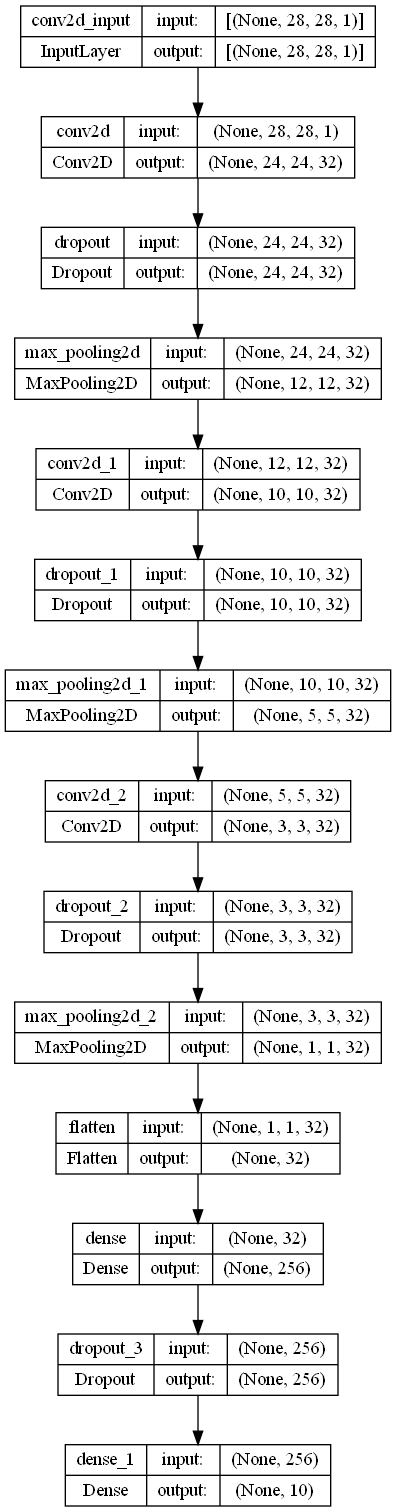

In [8]:
from tensorflow.keras.utils import plot_model
plot_model(net, to_file='network_structure.png', show_shapes=True)

In [9]:
#Compiling the NN.
#This function needs to be supplied with the training data, and optionally, validation data, and other parameters such as
#the number of epochs and the batch size to be used, e.g.:
net.compile(loss='categorical_crossentropy', optimizer='adam')
history = net.fit(x_train_mixed, y_train_mixed,
validation_data=(x_test_mixed, y_test_mixed),
 epochs=25,
 batch_size=128)

Epoch 1/25
4219/4219 [==============================] - 94s 22ms/step - loss: 0.2624 - val_loss: 0.1060
Epoch 2/25
4219/4219 [==============================] - 96s 23ms/step - loss: 0.1102 - val_loss: 0.0732
Epoch 3/25
4219/4219 [==============================] - 95s 22ms/step - loss: 0.0899 - val_loss: 0.0664
Epoch 4/25
4219/4219 [==============================] - 95s 23ms/step - loss: 0.0800 - val_loss: 0.0592
Epoch 5/25
4219/4219 [==============================] - 95s 22ms/step - loss: 0.0747 - val_loss: 0.0587
Epoch 6/25
4219/4219 [==============================] - 95s 23ms/step - loss: 0.0716 - val_loss: 0.0545
Epoch 7/25
4219/4219 [==============================] - 96s 23ms/step - loss: 0.0674 - val_loss: 0.0459
Epoch 8/25
4219/4219 [==============================] - 97s 23ms/step - loss: 0.0654 - val_loss: 0.0544
Epoch 9/25
4219/4219 [==============================] - 89s 21ms/step - loss: 0.0638 - val_loss: 0.0529
Epoch 10/25
4219/4219 [==============================] - 83s 20m

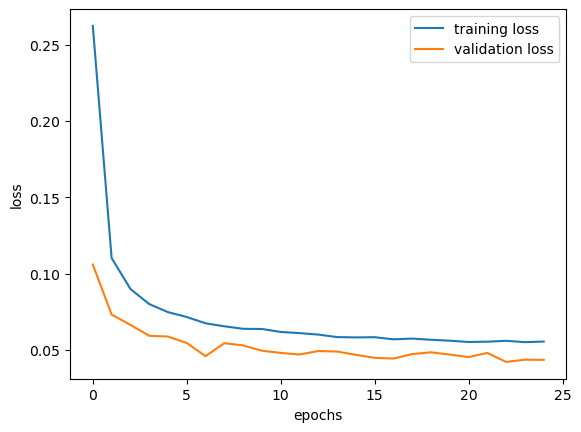

In [10]:
#The history variable returned by the fit function can be used to produce a plot showing the
#change in the cost function during training using the following python code:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [11]:
#A trained network can be saved to disk using:
net.save("k23031306_coursework1final2.h5")

In [12]:
#A saved model can be reloaded using:
from tensorflow.keras.models import load_model
net=load_model("k23031306_coursework1final2.h5")

In [13]:
#The performance of the trained network can be tested, for example, by finding the outputs that
#it produces to the testing data, and comparing these to the true category labels using the
#following python code.
import numpy as np
# Predict labels for the test set
outputs = net.predict(x_test_mixed)
labels_predicted = np.argmax(outputs, axis=1)
# Extract true labels for the test set
true_labels_test = np.argmax(y_test_mixed, axis=1)
# Calculate the number of misclassified samples
misclassified = np.sum(labels_predicted != true_labels_test)
# Calculate the percentage of misclassified samples
percentage_misclassified = 100 * misclassified / true_labels_test.size
print('Percentage misclassified =', percentage_misclassified)

2813/2813 [==============================] - 4s 1ms/step
Percentage misclassified = 1.1833333333333333


1/1 [==============================] - 0s 18ms/step


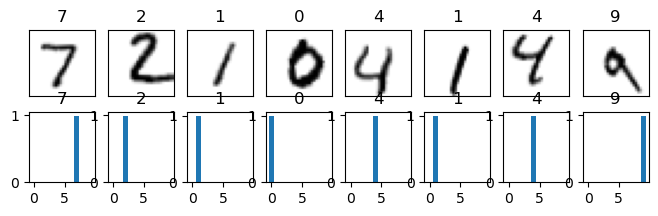

In [14]:
#To show the outputs a network produces for a few specific exemplars use the following python code:
plt.figure(figsize=(8, 2))
for i in range(0,8):
 ax=plt.subplot(2,8,i+1)
 plt.imshow(x_test_mixed[i,:].reshape(28,28), cmap=plt.get_cmap('gray_r'))
 plt.title(labels_test[i])
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
    
for i in range(0,8):
 #output = net.predict(x_test[i,:].reshape(1, 784)) #if MLP
 output = net.predict(x_test_mixed[i,:].reshape(1, 28,28,1)) #if CNN
 output=output[0,0:]
 plt.subplot(2,8,8+i+1)
 plt.bar(np.arange(10.),output)
 plt.title(np.argmax(output))